In [1]:
import yfinance as yf
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import nasdaqdatalink
import os
from dotenv import load_dotenv

In [3]:
nasdaqdatalink.ApiConfig.api_key = "jZh4kTZdBvtrnEN-rdyz"

In [28]:
gdp_data = nasdaqdatalink.get("FRED/GDP")
gdp_data /= 1000
gdp_data.rename(columns = {"Value": "GDP"}, inplace = True)
    
cpi_data = nasdaqdatalink.get("FRED/CPIAUCSL")
cpi_data.rename(columns = {"Value": "Inflation"}, inplace = True)

ue_data = nasdaqdatalink.get("FRED/UNRATE")
ue_data.rename(columns = {"Value": "UE Rate"}, inplace = True)

interest_data = nasdaqdatalink.get("FRED/FEDFUNDS")
interest_data.rename(columns = {"Value": "Interest Rate"}, inplace = True)

econ_data = pd.concat([gdp_data, cpi_data, ue_data, interest_data], axis = 1)

econ_data.dropna(inplace = True)

econ_data = econ_data[-100:]

econ_data

,GDP,Inflation,UE Rate,Interest Rate
Date,,,,
1997-01-01,8.362655,159.400,5.3,5.25
1997-04-01,8.518825,159.900,5.1,5.51
1997-07-01,8.662823,160.400,4.9,5.52
1997-10-01,8.765907,161.500,4.7,5.50
1998-01-01,8.866480,162.000,4.6,5.56
...,...,...,...,...
2020-10-01,21.477597,260.352,6.9,0.09
2021-01-01,22.038226,262.200,6.4,0.09
2021-04-01,22.740959,266.727,6.0,0.07


In [5]:
econ_data["Inflation_Growth"] = econ_data["Inflation"].pct_change()
econ_data["GDP_Growth"] = econ_data["GDP"].pct_change()
econ_data["UE_Growth"] = econ_data["UE Rate"].pct_change()
# econ_data["Interest_Growth"] = econ_data["Interest Rate"].pct_change()

#Calculate the 1st derivative of economic data
econ_data["Speed_of_Inflation_Growth"] = econ_data["Inflation_Growth"].pct_change()
econ_data["Speed_of_GDP_Growth"] = econ_data["GDP_Growth"].pct_change()
econ_data["Speed_of_UE_Rate"] = econ_data["UE_Growth"].pct_change()
# econ_data["Speed_of_Interest_Growth"] = econ_data["Interest_Growth"].pct_change()

econ_data.replace([np.inf, -np.inf], 0, inplace = True)
econ_data.dropna(inplace = True)
#Display economic data
display(econ_data)

,GDP,Inflation,UE Rate,Interest Rate,Inflation_Growth,GDP_Growth,UE_Growth,Speed_of_Inflation_Growth,Speed_of_GDP_Growth,Speed_of_UE_Rate
Date,,,,,,,,,,
1985-01-01,4.230168,105.700,7.3,8.35,0.005709,0.019674,-0.013514,-0.405709,0.249622,0.013514
1985-04-01,4.294887,107.000,7.3,8.27,0.012299,0.015299,0.000000,1.154368,-0.222340,-1.000000
1985-07-01,4.386773,107.700,7.4,7.88,0.006542,0.021394,0.013699,-0.468081,0.398374,0.000000
1985-10-01,4.444094,108.500,7.1,7.99,0.007428,0.013067,-0.040541,0.135429,-0.389239,-3.959459
1986-01-01,4.507894,109.900,6.7,8.14,0.012903,0.014356,-0.056338,0.737097,0.098674,0.389671
...,...,...,...,...,...,...,...,...,...,...
2020-10-01,21.477597,260.352,6.9,0.09,0.006997,0.016038,-0.323529,-0.268328,-0.811946,0.056863
2021-01-01,22.038226,262.200,6.4,0.09,0.007098,0.026103,-0.072464,0.014461,0.627558,-0.776021
2021-04-01,22.740959,266.727,6.0,0.07,0.017265,0.031887,-0.062500,1.432410,0.221585,-0.137500


In [31]:
econ_data.index[-1].year

2021

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = econ_data.drop(columns = ["Interest Rate"])
y = econ_data["Interest Rate"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [7]:
neural = Sequential()

number_input_features = len(X.columns)
hidden_nodes_layer1 =  (number_input_features + 1) // 2 
hidden_nodes_layer2 = (hidden_nodes_layer1 + 1) // 2
# hidden_nodes_layer3 = (hidden_nodes_layer2 + 1) // 2

neural.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="elu"))
neural.add(Dense(units=hidden_nodes_layer2, activation="elu"))
# neural.add(Dense(units=hidden_nodes_layer3, activation="elu"))
neural.add(Dense(units=1, activation="linear"))

neural.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 50        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 72
Trainable params: 72
Non-trainable params: 0
_________________________________________________________________


In [8]:
neural.compile(loss = "mse", optimizer = "adam",  metrics = ["mse"])

model = neural.fit(X_train_scaled, y_train, epochs = 2000)

Epoch 1/2000
4/4 [==============================] - 0s 1ms/step - loss: 16.8106 - mse: 16.8106
Epoch 2/2000
4/4 [==============================] - 0s 661us/step - loss: 16.4824 - mse: 16.4824
Epoch 3/2000
4/4 [==============================] - 0s 665us/step - loss: 16.1610 - mse: 16.1610
Epoch 4/2000
4/4 [==============================] - 0s 665us/step - loss: 15.8751 - mse: 15.8751
Epoch 5/2000
4/4 [==============================] - 0s 665us/step - loss: 15.5757 - mse: 15.5757
Epoch 6/2000
4/4 [==============================] - 0s 665us/step - loss: 15.2852 - mse: 15.2852
Epoch 7/2000
4/4 [==============================] - 0s 665us/step - loss: 15.0133 - mse: 15.0133
Epoch 8/2000
4/4 [==============================] - 0s 665us/step - loss: 14.7323 - mse: 14.7323
Epoch 9/2000
4/4 [==============================] - 0s 838us/step - loss: 14.4793 - mse: 14.4793
Epoch 10/2000
4/4 [==============================] - 0s 665us/step - loss: 14.2063 - mse: 14.2063
Epoch 11/2000
4/4 [============

In [9]:
Y_prediction = neural.predict(X_train_scaled)
Y_prediction = Y_prediction.squeeze()

results = pd.DataFrame( {"Predictions": Y_prediction, "Actual": y_train})
display(results)

model_loss, model_accuracy = neural.evaluate(X_train_scaled,y_train,verbose=2)
print(f"Loss: {model_loss}, MSE: {model_accuracy}")

,Predictions,Actual
Date,,
2012-01-01,-0.057461,0.08
2009-04-01,0.506089,0.15
1990-01-01,8.467754,8.23
1986-01-01,7.588478,8.14
2018-10-01,2.449578,2.19
...,...,...
2019-04-01,2.361310,2.42
2020-04-01,0.085413,0.05
2003-10-01,0.951267,1.01


4/4 - 0s - loss: 0.2803 - mse: 0.2803 - 92ms/epoch - 23ms/step
Loss: 0.2803398668766022, MSE: 0.2803398668766022


In [10]:
Y_test_prediction = neural.predict(X_test_scaled)
Y_test_prediction = Y_test_prediction.squeeze()

test_results = pd.DataFrame( {"Predictions": Y_prediction, "Actual": y_train})
display(test_results.sort_index().tail(30))

model_loss, model_accuracy = neural.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, MSE: {model_accuracy}")

,Predictions,Actual
Date,,
2012-10-01,0.072720,0.16
2013-04-01,0.135148,0.15
2013-07-01,-0.068487,0.09
2014-04-01,-0.004709,0.09
2014-07-01,0.092855,0.09
2014-10-01,0.053947,0.09
2015-01-01,0.251493,0.11
2015-04-01,0.271620,0.12
2015-07-01,0.313088,0.13


2/2 - 0s - loss: 1.1124 - mse: 1.1124 - 15ms/epoch - 7ms/step
Loss: 1.1123957633972168, MSE: 1.1123957633972168


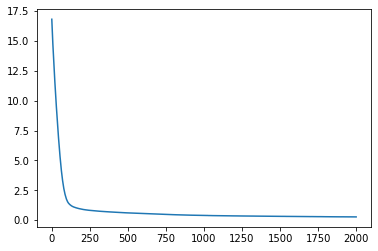

In [11]:
plt.plot(model.history["loss"])

<AxesSubplot:xlabel='Date'>

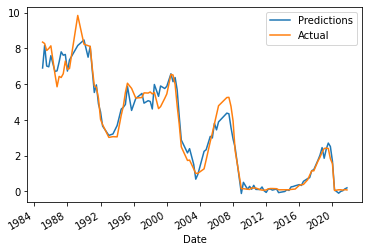

In [12]:
test_results.plot()

In [22]:
Y_prediction

array([-5.74607551e-02,  5.06089211e-01,  8.46775436e+00,  7.58847809e+00,
        2.44957829e+00,  5.87875032e+00,  4.60236216e+00,  1.35147601e-01,
       -1.00823611e-01,  1.11346036e-01,  5.31767988e+00,  4.60918188e+00,
        3.37294012e-01,  2.71619588e-01,  9.28548872e-02,  7.65783215e+00,
        3.07812023e+00,  1.17968470e-01,  6.72823286e+00,  7.01163530e+00,
        6.57537508e+00,  1.15706682e+00,  1.38703018e-01,  6.70720291e+00,
       -4.70873713e-03,  5.61961055e-01,  5.75348139e+00,  3.13088328e-01,
        2.46904761e-01,  5.89480782e+00, -6.84870183e-02,  2.23875928e+00,
        5.47867918e+00,  5.68454790e+00,  4.37716341e+00, -1.17532641e-01,
        2.51493007e-01,  7.61679745e+00,  3.68132305e+00,  3.21120358e+00,
        5.39473593e-02,  4.86291027e+00,  3.57849896e-02,  1.98532373e-01,
        3.65145159e+00,  5.53220367e+00,  2.15202522e+00,  7.69046426e-01,
        3.33211452e-01,  2.45452666e+00,  1.19976670e-01,  7.14394093e-01,
        3.57837057e+00,  

In [19]:
test_prediction = neural.predict(econ_data[-10:].drop(columns = "Interest Rate"))
test_prediction

array([[-40.25356 ],
       [-40.454807],
       [-40.567665],
       [-42.31634 ],
       [-42.028923],
       [-41.6435  ],
       [-41.86878 ],
       [-42.477825],
       [-43.187096],
       [-43.76228 ]], dtype=float32)

In [13]:
# for index, row in econ_data.iterrows():
#     if (econ_data.loc[index, 'Speed_of_GDP_Growth'] < 0 and econ_data.loc[index, 'Speed_of_Inflation_Growth'] < 0):
#         econ_data.loc[index, 'stageindex'] = 1
#         econ_data.loc[index, 'stage'] = 'Reflation'
#     if (econ_data.loc[index, 'Speed_of_GDP_Growth'] > 0 and econ_data.loc[index, 'Speed_of_Inflation_Growth'] < 0):
#         econ_data.loc[index, 'stageindex'] = 2
#         econ_data.loc[index, 'stage'] = 'Recovery'
#     if (econ_data.loc[index, 'Speed_of_GDP_Growth'] > 0 and econ_data.loc[index, 'Speed_of_Inflation_Growth'] > 0):
#         econ_data.loc[index, 'stageindex'] = 3
#         econ_data.loc[index, 'stage'] = 'Overheat'
#     if (econ_data.loc[index, 'Speed_of_GDP_Growth'] < 0 and econ_data.loc[index, 'Speed_of_Inflation_Growth'] > 0):
#         econ_data.loc[index, 'stageindex'] = 4
#         econ_data.loc[index, 'stage'] = 'Stagflation'
        
# econ_data.dropna(inplace = True)
# print(econ_data["stageindex"].unique())

In [14]:
# econ_data["Interest Rate"].plot()